In [18]:
import numpy as np
import neuraltda.simpComp as sc
import neuraltda.spectralAnalysis as sa
import matplotlib.pyplot as plt
import tqdm
%matplotlib inline

In [99]:
# each spike consists of a cell# and a bin #
Nspikes = 1750
Ncells = 20
Nbins = 1000

cell_spike = np.random.randint(0, Ncells, size=Nspikes)
bin_spike = np.random.randint(0, Nbins, size=Nspikes)

spiketrain = np.array([[x[0], x[1]] for x in zip(cell_spike, bin_spike)])
orig_spiketrain = np.copy(spiketrain)

In [101]:
def sptrain_to_binary(sptrain):
    binmat = np.zeros((Ncells, Nbins))
    for sp in sptrain:
        binmat[sp[0], sp[1]] += 1
    return binmat

def permute_spiketrain_time(sptrain):
    
    #pick a random spike:
    spnum = np.random.randint(0, len(sptrain))
    spike = np.copy(sptrain[spnum])
    if np.random.rand() < 0.5:
        spike[1] = max(0, spike[1]-1)
    else:
        spike[1] = min(Nbins-1, spike[1]+1)
        
    sptrain2 = np.copy(sptrain)
    sptrain2[spnum] = spike
    return sptrain2

def permute_spiketrain_cells(sptrain):
    
    #pick a random spike:
    spnum = np.random.randint(0, len(sptrain))
    spike = np.copy(sptrain[spnum])
    if np.random.rand() < 0.5:
        spike[0] = max(0, spike[0]-1)
    else:
        spike[0] = min(Ncells-1, spike[0]+1)
        
    sptrain2 = np.copy(sptrain)
    sptrain2[spnum] = spike
    return sptrain2

def permute_spiketrain(sptrain):
    if np.random.rand() < 0.5:
        return permute_spiketrain_time(sptrain)
    else:
        return permute_spiketrain_cells(sptrain)
        

def do_JS(sp1, sp2, d, beta):
    sp1mat = sptrain_to_binary(sp1)
    sp2mat = sptrain_to_binary(sp2)
    sp1max = sc.binarytomaxsimplex(sp1mat)
    sp2max = sc.binarytomaxsimplex(sp2mat)
    scg1 = sc.simplicialChainGroups(sp1max)
    scg2 = sc.simplicialChainGroups(sp2max)
    return compute_JS_expanded(scg1, scg2, d, beta)

def compute_JS_expanded(scgA, scgB, d, beta):
    '''
    Computes the Jensen-Shannon Divergence between
    simplicial complexes A and B in dimension d
    using parameter beta.
    The bases are expanded according to reconcile_laplacians
    '''
    # print('Computing Boundary Operators')
    # DA = sc.boundaryOperatorMatrix(scgA)
    # DB = sc.boundaryOperatorMatrix(scgB)
    #print('Computing Laplacians')
    LA = sc.compute_laplacian(scgA, d)
    LB = sc.compute_laplacian(scgB, d)

    #print('Reconciling Laplacians')
    (LA, LB) = sc.reconcile_laplacians(LA, LB)

    #print('Computing Density Matrices')
    rho1 = sc.densityMatrix(LA, beta)
    rho2 = sc.densityMatrix(LB, beta)

    #print('Computing JS divergence')
    div = sc.JSdivergence(rho1, rho2)
    return div

In [ ]:
sp2 = permute_spiketrain(spiketrain)
d = 2
beta = -1.8
do_JS(orig_spiketrain, sp2, d, beta)

In [104]:
d = 2
beta = -1.8
JS = []
spdiff = []
sp2 = np.copy(spiketrain)
for ind in tqdm.tqdm(range(5000)):
    sp2 = permute_spiketrain(sp2)
    
    if np.mod(ind, 10) == 0:
        #print('JS')
        JS.append(do_JS(sp2, orig_spiketrain, d, beta))
        sp2mat = sptrain_to_binary(sp2)
        omat = sptrain_to_binary(orig_spiketrain)
        spdiff.append(np.sum(np.square(sp2mat - omat)))

100%|██████████| 5000/5000 [13:25<00:00,  6.21it/s]


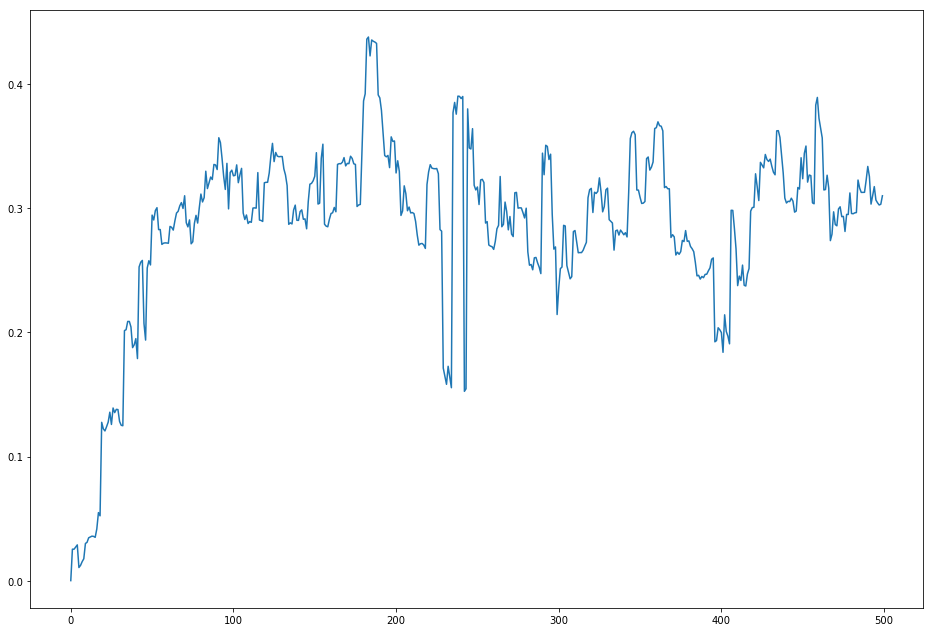

In [103]:
plt.figure(figsize=(16,11))
plt.plot(JS)

In [23]:
np.amax(sp2mat-omat)

1.0

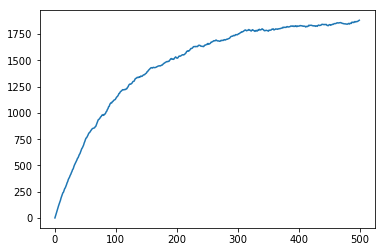

In [93]:
plt.plot(spdiff)
#plt.semilog(np.sqrt(10000*np.arange(500)))

In [86]:
1000**2 /100

10000.0